<a href="https://colab.research.google.com/github/LordLean/California-House-Prices/blob/main/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load Data

In [ ]:
!wget https://raw.githubusercontent.com/LordLean/California-House-Prices/main/housing.csv

--2021-11-19 14:48:28--  https://raw.githubusercontent.com/LordLean/California-House-Prices/main/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1159215 (1.1M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.11M  --.-KB/s    in 0.05s   

2021-11-19 14:48:28 (21.6 MB/s) - ‘housing.csv’ saved [1159215/1159215]



# EDA

In [ ]:
df = pd.read_csv('housing.csv', index_col=None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   median_house_value  16512 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [ ]:
print(df.isnull().sum())
# Drop rows with NaN values.
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000
mean,-119.560505,35.618924,28.664219,2639.549009,538.522026,1424.693771,499.759178,3.873539,207291.292523
std,2.003196,2.134194,12.616550,2201.921714,425.256071,1147.745539,385.199342,1.911920,115719.523632
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.780000,33.930000,18.000000,1447.000000,295.000000,788.000000,280.000000,2.562500,120000.000000
50%,-118.490000,34.250000,29.000000,2121.000000,435.000000,1165.000000,410.000000,3.535250,179800.000000
75%,-118.000000,37.710000,37.000000,3139.250000,647.000000,1715.000000,603.000000,4.740850,264600.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98439b46d0>,
      dtype=object)

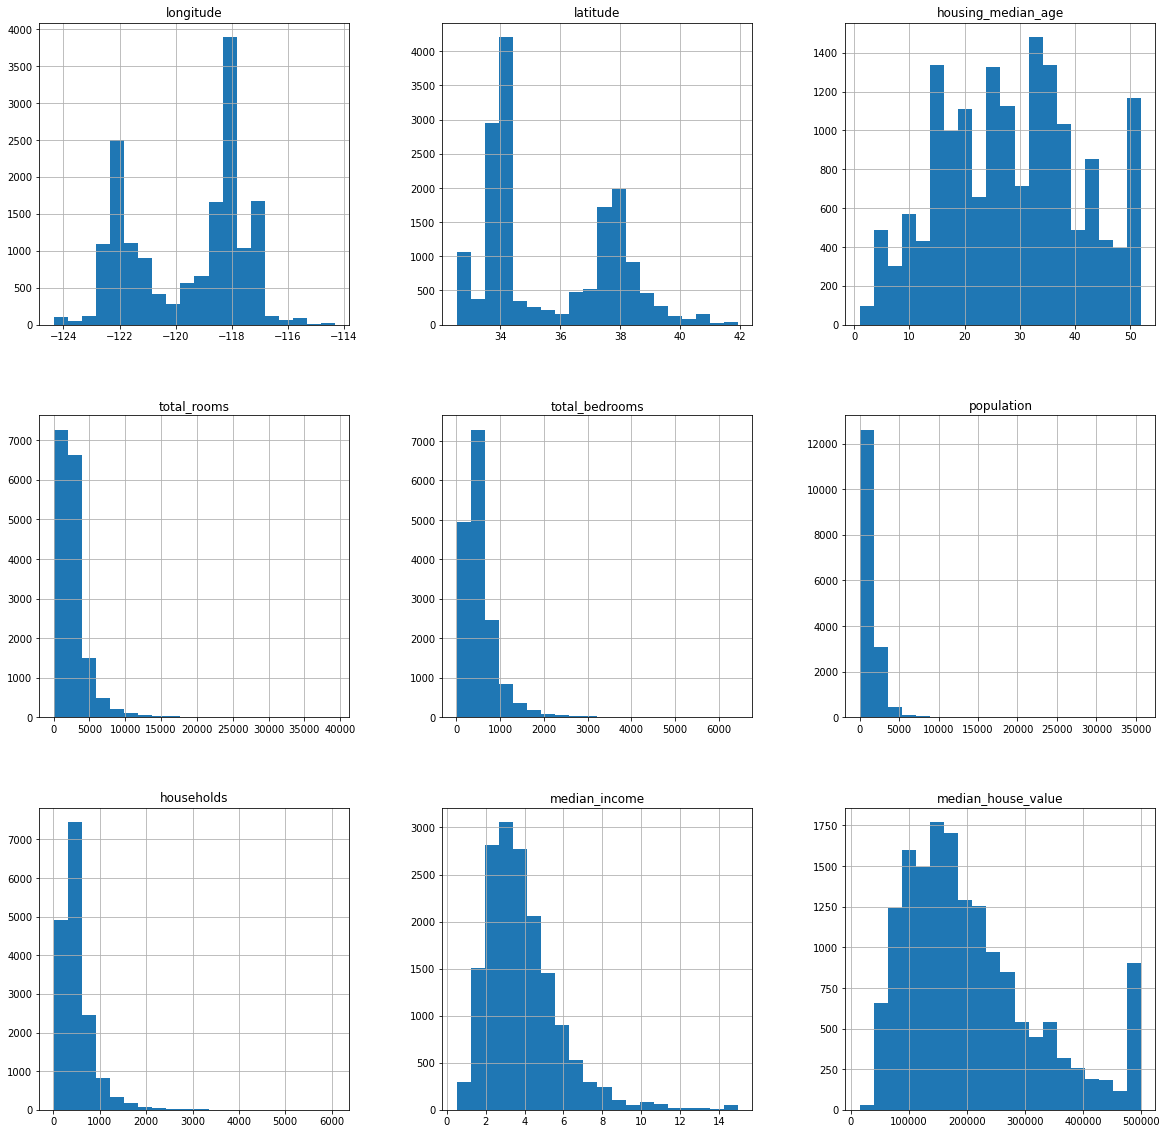

In [ ]:
df.hist(bins=20,figsize=(20,20))

In [ ]:
print(df["ocean_proximity"].value_counts(normalize=True))

<1H OCEAN     0.441814
INLAND        0.315406
NEAR OCEAN    0.130690
NEAR BAY      0.111845
ISLAND        0.000245
Name: ocean_proximity, dtype: float64


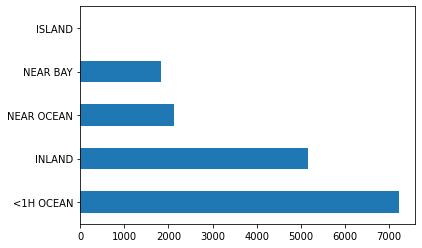

In [ ]:
df["ocean_proximity"].value_counts().plot(kind = 'barh')

In [ ]:
df.corr().style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925276,-0.113865,0.043857,0.067794,0.098067,0.054115,-0.016958,-0.048533
latitude,-0.925276,1.000000,0.016195,-0.032928,-0.063420,-0.105603,-0.068083,-0.076985,-0.140124
housing_median_age,-0.113865,0.016195,1.000000,-0.362673,-0.322493,-0.298602,-0.305114,-0.115046,0.106318
total_rooms,0.043857,-0.032928,-0.362673,1.000000,0.930445,0.855232,0.917096,0.193655,0.130030
total_bedrooms,0.067794,-0.063420,-0.322493,0.930445,1.000000,0.876054,0.978952,-0.009832,0.046566
population,0.098067,-0.105603,-0.298602,0.855232,0.876054,1.000000,0.905994,0.001248,-0.027701
households,0.054115,-0.068083,-0.305114,0.917096,0.978952,0.905994,1.000000,0.010542,0.061643
median_income,-0.016958,-0.076985,-0.115046,0.193655,-0.009832,0.001248,0.010542,1.000000,0.690114
median_house_value,-0.048533,-0.140124,0.106318,0.130030,0.046566,-0.027701,0.061643,0.690114,1.000000


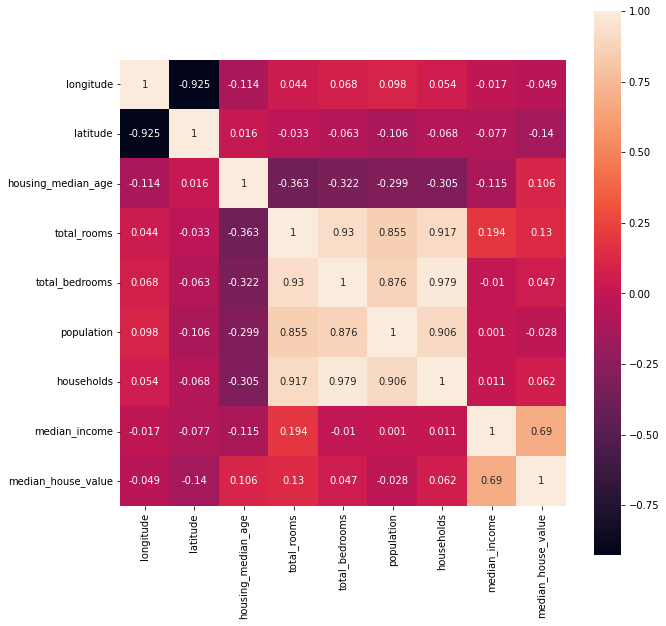

In [ ]:
conf_mat = df.corr()
conf_mat = conf_mat.round(3)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='g',
            # cmap="magma",
            square=True,)
plt.show()

No handles with labels found to put in legend.


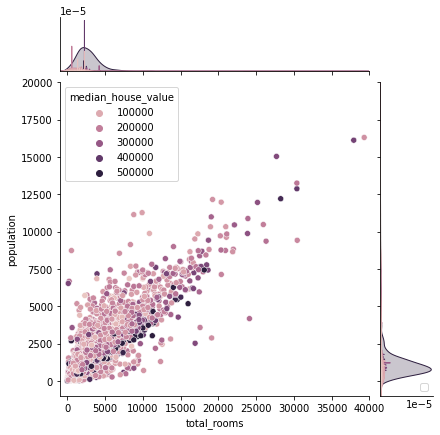

In [ ]:
plot = sns.jointplot(x="total_rooms", y="population", data=df, kind="scatter", hue="median_house_value",)
sns.despine()
plot.ax_marg_x.set_xlim(-1000,40000)
plot.ax_marg_y.set_ylim(-1000,20000)
plt.legend(loc="lower right")

(-127.5, -112.5)

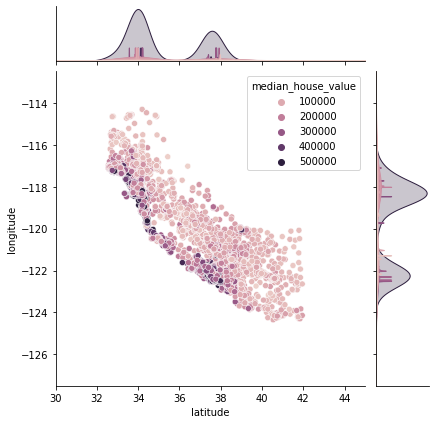

In [ ]:
plot = sns.jointplot(x="latitude",y="longitude",data=df, hue="median_house_value")
sns.despine()
plot.ax_marg_x.set_xlim(30,45)
plot.ax_marg_y.set_ylim(-127.5,-112.5)

# Model

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import time 

import torch
import torch.nn as nn

import pickle

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error

In [278]:
class Regressor(nn.Module):

    
    def __init__(self, x, nb_epoch = 1000):
        # You can add any input parameters you need
        # Remember to set them with a 
        # default value for LabTS tests
        """ 
        Initialise the model.
          
        Arguments:
            - x {pd.DataFrame} -- Raw input data of shape 
                (batch_size, input_size), used to compute the size 
                of the network.
            - nb_epoch {int} -- number of epoch to train the network.

        """

        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################
        # Super class constructor.
        super().__init__()
        # Replace this code with your own
        X, _ = self._preprocessor(x, training = True)
        self.input_size = X.shape[1]
        self.output_size = 1
        self.nb_epoch = nb_epoch 

        self._sequential = nn.Sequential(
            nn.Linear(self.input_size, 1500),
            nn.ReLU(),
            nn.Linear(1500, 500),
            nn.ReLU(),
            nn.Linear(500, 300),
            nn.ReLU(),
            nn.Linear(300, self.output_size)
        )

        #######################################################################
        #                       ** END OF YOUR CODE **
        #######################################################################



    
    def forward(self, x):

      return self._sequential(x)
    


    
    def _preprocessor(self, x, y = None, training = False):
        """ 
        Preprocess input of the network.
          
        Arguments:
            - x {pd.DataFrame} -- Raw input array of shape 
                (batch_size, input_size).
            - y {pd.DataFrame} -- Raw target array of shape (batch_size, 1).
            - training {boolean} -- Boolean indicating if we are training or 
                testing the model.

        Returns:
            - {torch.tensor} or {numpy.ndarray} -- Preprocessed input array of
              size (batch_size, input_size).
            - {torch.tensor} or {numpy.ndarray} -- Preprocessed target array of
              size (batch_size, 1).

        """

        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################
        # NaNs.
        x["total_bedrooms"].fillna((x["total_bedrooms"].mean()), inplace=True)

        # Categorical one-hot encoding.
        # x = self._one_hot(x)
        if "ocean_proximity" in x.columns:
          x.drop("ocean_proximity",axis=1,inplace=True)

        # Scaler
        if training:
          # Create scaler objects.
          self.x_scaler = MinMaxScaler()
          # Scale and store transformation.
          x = self.x_scaler.fit_transform(x)
          if y is not None:
            self.y_scaler = MinMaxScaler()
            y = self.y_scaler.fit_transform(y.to_numpy().reshape(-1,1))
        else:
          # Scale only.
          x = self.x_scaler.transform(x)
          # For scoring function.
          if y is not None:
            y = self.y_scaler.transform(y.to_numpy().reshape(-1,1))

        # Tensor conversion.
        x = torch.tensor(x, dtype=torch.float)
        if y is not None:
          y = torch.tensor(y, dtype=torch.float)

        # Return preprocessed x and y, return None for y if it was None
        return x, (y if y is not None else None)

        #######################################################################
        #                       ** END OF YOUR CODE **
        #######################################################################


    
    def _one_hot(self, x):
      """ 
        One-hot encode categorical data within passed dataframe.
          
        Arguments:
            - x {pd.DataFrame} -- Raw input array of shape 
                (batch_size, input_size).

        Returns:
            - x {pd.DataFrame} -- Input array of shape 
                (batch_size, input_size + num_of_new_categories).
      """
      # Create encoder instance and fit-transform to ocean proximity series.
      enc = OneHotEncoder()
      X_ = enc.fit_transform(x.ocean_proximity.values.reshape(-1,1)).toarray()
      # Create one-hot encoded dataframe for ocean proximity.
      cat_names = [name for name in enc.categories_[0]]
      x_one_hot = pd.DataFrame(X_, columns = cat_names)
      # Reset dataframe indexs.
      x.reset_index(drop=True, inplace=True)
      x_one_hot.reset_index(drop=True, inplace=True)
      # Concatenate all dataframes back together.
      x = pd.concat([x, x_one_hot], axis=1)
      # Drop original column
      x.drop("ocean_proximity", axis=1, inplace=True)
      return x


        
    
    def fit(self, x, y,
            lr=1e-3, opt_func=torch.optim.Adam, mini_batch=None,
            regularizer=None, lambda_decay=1e-5,
            callbacks = {},
            validation_set=None):
        """
        Regressor training function

        Arguments:
            - x {pd.DataFrame} -- Raw input array of shape 
                (batch_size, input_size).
            - y {pd.DataFrame} -- Raw output array of shape (batch_size, 1).

        Returns:
            self {Regressor} -- Trained model.

        """

        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################
        
        X, y = self._preprocessor(x, y = y, training = True) # Do not forget

        if validation_set:
          X_val, y_val = validation_set
          X_val, y_val = self._preprocessor(X_val, y=y_val, training=False)

        # Loss function.
        criterion = nn.MSELoss()
        # Optimizer.
        optimizer = opt_func(self.parameters(), lr)
        
        # Callback variables
        verbose = callbacks.get("verbose", False)
        patience = callbacks.get("patience",10)
        monitor = callbacks.get("monitor", "loss")
        # Early stopping variables.
        early_stop = 0
        loss_to_beat = None # Var to store best loss within patience range.

        # History to store: epochs, loss, (val_loss)
        self.history = []
        for epoch in range(self.nb_epoch):

          # For mini-batch selections.
          permutation = torch.randperm(X.shape[0])
          # batch learning.
          if mini_batch is None:
            mini_batch = X.shape[0]
          # mini-batch learning.
          else:
            mini_batch = mini_batch

          # Mini-batch (or batch if mini_batch == X.shape[0])
          for i in range(0, X.shape[0], mini_batch):
            # Reset gradients
            optimizer.zero_grad()
            # Batch indicies.
            indicies = permutation[i:i+mini_batch]
            batch_X, batch_y = X[indicies], y[indicies]
            # Forward
            batch_y_hat = self.forward(batch_X)
            # Loss
            loss = criterion(batch_y_hat, batch_y)
            # Perform weight regularization (if specified, else loss is unchanged).
            loss = self._weight_regularization(loss, regularizer, lambda_decay)
            # End training if:
            if torch.isnan(loss) or torch.isinf(loss):
              if verbose:
                print("Training ended: loss is Nan or Inf.")
                print("Epoch: {}, Loss: {}".format(epoch,loss))
              break
            # Backward
            loss.backward()
            # Update Parameters
            optimizer.step()


          # Early Stopping
          # Data collected per epoch.
          epoch_data = (epoch, loss.item())
          if validation_set:
            # Prevent gradient mutations.
            with torch.no_grad():
              y_hat_val = self.forward(X_val)
              val_loss = criterion(y_hat_val, y_val)
              # add val_loss to epoch_data tuple.
              epoch_data += (val_loss.item(),)
          
          i_loss = None
          if monitor == "val_loss" and validation_set:
            # Counter to index epoch_data and previous 'history' record.
            i_loss = 2
            curr_loss = epoch_data[i_loss] # Validation Loss
          else:
            i_loss = 1
            curr_loss = epoch_data[i_loss] # Loss
          if loss_to_beat is None:
            if self.history: # If list is not empty.
              if curr_loss > self.history[-1][i_loss]: # If new loss is greater than prev loss.
                loss_to_beat = self.history[-1][i_loss] # Set loss to beat to be prev loss.
                early_stop += 1 # Increment doomsday counter
          elif loss_to_beat is not None:
            if curr_loss > loss_to_beat: # If new loss continues to underperform loss to beat.
              early_stop += 1 # Increment doomsday counter
            else:
              loss_to_beat = None # Loss to beat was beaten, reset variable.
              early_stop = 0 
          # Patience check
          if early_stop == patience:
            if verbose:
              print("Training ended, early stopping at:")
              print("Epoch: {}, {}: {}\nloss-to-beat: {}".format(epoch, monitor, curr_loss, loss_to_beat))
            break

          # Print training process.
          self._verbose(verbose, epoch_data)
          # Store epoch, loss in history list.
          self.history.append(epoch_data)
        
        return self


        #######################################################################
        #                       ** END OF YOUR CODE **
        #######################################################################

            
    
    def predict(self, x):
        """
        Ouput the value corresponding to an input x.

        Arguments:
            x {pd.DataFrame} -- Raw input array of shape 
                (batch_size, input_size).

        Returns:
            {np.darray} -- Predicted value for the given input (batch_size, 1).

        """

        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        # Preprocess test data.
        X, _ = self._preprocessor(x, training = False) # Do not forget
        
        # Predict.
        y_pred = self.forward(X)
        # Detach Tensor.
        y_pred = y_pred.detach().numpy()
        # Inverse Scale.
        y_pred = self.y_scaler.inverse_transform(y_pred)
        return y_pred

        #######################################################################
        #                       ** END OF YOUR CODE **
        #######################################################################

    
    def score(self, x, y):
        """
        Function to evaluate the model accuracy on a validation dataset.

        Arguments:
            - x {pd.DataFrame} -- Raw input array of shape 
                (batch_size, input_size).
            - y {pd.DataFrame} -- Raw ouput array of shape (batch_size, 1).

        Returns:
            {float} -- Quantification of the efficiency of the model.

        """

        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        y_pred = self.predict(x)

        rmse = mean_squared_error(y, y_pred, squared=False)

        return rmse

        #######################################################################
        #                       ** END OF YOUR CODE **
        #######################################################################


    
    def _weight_regularization(self, loss, regularizer, lambda_decay):
      '''
      Perform weight regularization.
      '''
      # Weight Decay
      if regularizer is not None and isinstance(regularizer, str):
        regularizer = regularizer.lower()
        if regularizer not in ["l1", "l2"]:
          raise ValueError("This model only accepts L1 or L2 regularization")
        else:
          if regularizer == "l1":
            # Only apply regularization to weights (not biases).
            lx_norm = sum(p.abs().sum() for name, p in regressor.named_parameters() if "bias" not in name)
          if regularizer == "l2":
            lx_norm = sum(p.pow(2.0).sum() for name, p in regressor.named_parameters() if "bias" not in name)
          # Perform weight regularization.
          loss = loss + lambda_decay * lx_norm
      return loss

    
    
    def _verbose(self, verbose, epoch_data):
      '''
      Print training scores of model during fit function.
      '''
      if verbose and epoch_data[0] % 10 == 0:
        if len(epoch_data) == 3:
          e, l, v_l = epoch_data
          print("Epoch: {}, Loss: {}, Val-Loss: {}".format(e, l, v_l))
        else:
          e, l = epoch_data
          print("Epoch: {}, Loss: {}".format(e, l))


    def plot_performance(self):
      '''
      Plot training performance of model.
      '''
      try:
        l_list = []
        v_l_list = []
        for _, l, v_l in self.history:
          l_list.append(l)
          v_l_list.append(v_l)
        sns.set_theme(style="darkgrid")
        sns.lineplot(x=range(len(l_list)), y=l_list, label="Loss")
        sns.lineplot(x=range(len(l_list)), y=v_l_list, label="Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
      except NameError:
        print("Matplotlib.pyplot must be imported as 'plt'\n Seaborn must be imported as 'sns'")
    

    def get_model(self):
      return self._sequential

## Model Example

In [271]:
# Reset.
df = pd.read_csv('housing.csv', index_col=None)

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [279]:
callbacks = {
    "verbose" : True,
    "monitor" : "val_loss",
    "patience" : 8
}

In [280]:
regressor = Regressor(X_train, nb_epoch=100)
regressor.fit(X_train,y_train, mini_batch=None, callbacks=callbacks, validation_set=[X_val,y_val])

Epoch: 0, Loss: 0.18650345504283905, Val-Loss: 0.05481337010860443
Epoch: 10, Loss: 0.037272389978170395, Val-Loss: 0.03629355505108833
Epoch: 20, Loss: 0.027030011638998985, Val-Loss: 0.026815028861165047
Epoch: 30, Loss: 0.02326125092804432, Val-Loss: 0.02472739666700363
Epoch: 40, Loss: 0.021420981734991074, Val-Loss: 0.02273232862353325
Epoch: 50, Loss: 0.02029547467827797, Val-Loss: 0.021417120471596718
Epoch: 60, Loss: 0.01931287907063961, Val-Loss: 0.0202366691082716
Epoch: 70, Loss: 0.018445009365677834, Val-Loss: 0.019272562116384506
Epoch: 80, Loss: 0.017810164019465446, Val-Loss: 0.01874946616590023
Epoch: 90, Loss: 0.01802382804453373, Val-Loss: 0.018317054957151413


Regressor(
  (_sequential): Sequential(
    (0): Linear(in_features=8, out_features=1500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1500, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=300, bias=True)
    (5): ReLU()
    (6): Linear(in_features=300, out_features=1, bias=True)
  )
)

In [281]:
rmse = regressor.score(X_test, y_test)
rmse

61766.08169677652

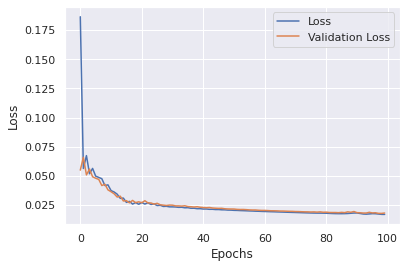

In [282]:
regressor.plot_performance()

# Hyper-Parameter Tuning

In [ ]:
# Reset.
df = pd.read_csv('housing.csv', index_col=None)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

columns=["optimizer", "learning_rate", "regularizer", "regularizer_lambda", "batch_size", "rmse", "model", "epoch", "train_time"]
df_hyper_param = pd.DataFrame(columns=columns)

opt_list = [torch.optim.Adam, torch.optim.SGD, torch.optim.RMSprop]
lr_list = [0.5e-2, 1e-3, 0.5e-3, 1e-4, 0.5e-4]
mini_batch_list = [64,128,256,512,1024,2048,None]
regularizer_list = [None, "l1", "l2"]
lambda_decay_list = [1e-4, 0.5e-4, 1e-5, 0.5e-6]

row_indx = 0
for opt in opt_list:
  # Get optimizer name as str.
  opt_name = str(opt).split(".")[-1][:-2]
  print(opt_name)

  for lr in lr_list:
    print("   lr:{}".format(lr))

    for mini_batch in mini_batch_list:
      print("       mini_batch:{}".format(mini_batch))
      
      for reg in regularizer_list:
        print("           regularizer:{}".format(reg))

        for lambda_decay in lambda_decay_list:
          print("             lambda_decay:{}".format(lambda_decay if reg is not None else 0))
          
          # Split data.
          X_train, X_test, y_train, y_test = train_test_split(X,y)
          # Validation
          X_train, X_val, y_train, y_val = train_test_split(X_train,y_train)

          # Instance, fit, and score regressor model.
          regressor = Regressor(X_train, nb_epoch=500)

          # Time training process.
          start_time = time.time()
          regressor.fit(X_train,y_train, lr=lr, opt_func=opt, regularizer=reg, lambda_decay=lambda_decay, mini_batch=mini_batch, patience=8, validation_set=[X_val,y_val])
          train_time = time.time() - start_time

          rmse = regressor.score(X_test, y_test)

          # Create hyperparameter dataframe.
          df_hyper_param.loc[row_indx] = [
                                          opt_name,
                                          lr,
                                          reg if reg is not None else "l0",
                                          lambda_decay if reg is not None else np.NINF,
                                          mini_batch if mini_batch is not None else np.inf,
                                          rmse,
                                          regressor, # model.
                                          regressor.history[-1][0], # epochs trained.
                                          train_time # Time taken to train.
          ]

          # Incremete row index.
          row_indx+=1
          
          # If no regularizer than skip all but one lambda_decay training values.
          if reg is None:
            break

In [ ]:
# from google.colab import files
# save_dataframe(df_hyper_param)
# files.download("part2_gridsearch_df.pickle")

In [ ]:
# Cut all rows with rmse above cut
cut = 200000
cut_rows = len(df_hyper_param)
df_hyper_param = df_hyper_param.query("rmse < {}".format(cut))
print("Cut {} records.".format(cut_rows - len(df_hyper_param)))

Cut 384 records.


In [ ]:
df_hyper_param

,optimizer,learning_rate,regularizer,regularizer_lambda,batch_size,rmse,model,epoch,train_time
0,0,4,0,0,0,74799.992090,Regressor(\n (_sequential): Sequential(\n ...,0,3.784034
1,0,4,1,4,0,73957.612336,Regressor(\n (_sequential): Sequential(\n ...,0,3.766763
2,0,4,1,3,0,70405.400970,Regressor(\n (_sequential): Sequential(\n ...,0,3.792004
3,0,4,1,2,0,68412.443448,Regressor(\n (_sequential): Sequential(\n ...,0,3.998586
4,0,4,1,1,0,65125.157227,Regressor(\n (_sequential): Sequential(\n ...,0,3.948509
...,...,...,...,...,...,...,...,...,...
917,1,0,2,1,3,82471.097733,Regressor(\n (_sequential): Sequential(\n ...,0,1.524429
923,1,0,2,4,4,98388.651579,Regressor(\n (_sequential): Sequential(\n ...,0,1.346191
924,1,0,2,3,4,98846.036010,Regressor(\n (_sequential): Sequential(\n ...,0,1.356747
925,1,0,2,2,4,96730.942648,Regressor(\n (_sequential): Sequential(\n ...,0,1.357615


# Parallel Coordinates

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [ ]:
##########################################################################
# Uncomment to create randomly generated df for parallel coordinates plot.
##########################################################################

# columns=["optimizer", "learning_rate", "regularizer", "regularizer_lambda", "batch_size", "rmse", "model", "train_time"]
# df_hyper_param = pd.DataFrame(columns=columns)
# for i in range(100):
#   df_hyper_param.loc[i] = [np.random.choice(["Adam","SGD", "RMSProp"]),
#                     np.random.choice([0.5e-2, 1e-3, 0.5e-3, 1e-4, 0.5e-4]),
#                     np.random.choice(["l0", "l1", "l2"]),
#                     np.random.choice([0.5e-2, 1e-3, 0.5e-3, 1e-4, 0.5e-4]),
#                     np.random.choice([32,64,128,256,512,1024,2048, np.inf]),
#                     np.random.randint(10000),
#                     regressor,
#                     np.random.randint(10)]

In [ ]:
def enc_column(col_name, df):
  '''
  Function to convert dataframe column from datatype to label encoded integers.
  Useful for plotting parallel coordinates.
  '''

  # Get sorted list of column names, ABC or 123.
  col_names = list(df[col_name].unique())
  col_names.sort()

  # Dictionary to transform actual value to numeric label.
  encoder = {name : i for i, name in enumerate(col_names)}
  
  # Function to return numeric label from actual value.
  def col_enc(col_num):
    return encoder[col_num]

  # Mutate df dataframe in-place.
  df[col_name] = df[col_name].apply(col_enc)

  return col_names, df

In [ ]:
# Label Encoding.
opt_names, df_hyper_param = enc_column("optimizer", df_hyper_param)

lr_names, df_hyper_param = enc_column("learning_rate", df_hyper_param)

regularizer_names, df_hyper_param = enc_column("regularizer", df_hyper_param)
regularizer_names[0] = "None" # Indicates no regularization.

regularizer_lambda_names, df_hyper_param = enc_column("regularizer_lambda", df_hyper_param)
regularizer_lambda_names[0] = "None" # Indicates no regularization so no decay.

batch_names, df_hyper_param = enc_column("batch_size", df_hyper_param)
batch_names[-1] = "None" # Indicates no mini-batch.

In [ ]:
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df_hyper_param['rmse'],
                   colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']]),
                  #  colorscale = "Electric"),
        dimensions = list([

            dict(range = [df_hyper_param['optimizer'].min(), df_hyper_param['optimizer'].max()],
                tickvals = list(range(len(opt_names))),
                label = 'Optimizer', values = df_hyper_param['optimizer'],
                ticktext = opt_names),
            
            dict(range = [df_hyper_param['learning_rate'].min(), df_hyper_param['learning_rate'].max()],
                tickvals = list(range(len(lr_names))),
                label = 'Learning Rate', values = df_hyper_param['learning_rate'],
                ticktext = lr_names),
            
            dict(range = [df_hyper_param['regularizer'].min(), df_hyper_param['regularizer'].max()],
                tickvals = list(range(len(regularizer_names))),
                label = 'regularizer', values = df_hyper_param['regularizer'],
                ticktext = regularizer_names),
            
            dict(range = [df_hyper_param['regularizer_lambda'].min(), df_hyper_param['regularizer_lambda'].max()],
                tickvals = list(range(len(regularizer_lambda_names))),
                label = 'regularizer_lambda', values = df_hyper_param['regularizer_lambda'],
                ticktext = regularizer_lambda_names),
            
            dict(range = [df_hyper_param['batch_size'].min(), df_hyper_param['batch_size'].max()],
                tickvals = list(range(len(batch_names))),
                label = 'Batch Size', values = df_hyper_param['batch_size'],
                ticktext = batch_names),
            
            dict(range = [df_hyper_param['rmse'].min(), df_hyper_param['rmse'].max()],
                label = 'rmse', values = df_hyper_param['rmse']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [ ]:
def save_dataframe(df): 
    """ 
    Utility function to save df in pickle.
    """
    # If you alter this, make sure it works in tandem with load_dataframe
    with open('part2_gridsearch_df.pickle', 'wb') as target:
        pickle.dump(df, target)
    print("\nSaved df in part2_gridsearch_df.pickle\n")

def load_dataframe(): 
    """ 
    Utility function to load the dataframe.
    """
    # If you alter this, make sure it works in tandem with save_dataframe
    with open('part2_gridsearch_df.pickle', 'rb') as target:
        trained_model = pickle.load(target)
    print("\nLoaded model in part2_gridsearch_df.pickle\n")
    return trained_model

# Pre-Defined Functions

In [ ]:
def save_regressor(trained_model): 
    """ 
    Utility function to save the trained regressor model in part2_model.pickle.
    """
    # If you alter this, make sure it works in tandem with load_regressor
    with open('part2_model.pickle', 'wb') as target:
        pickle.dump(trained_model, target)
    print("\nSaved model in part2_model.pickle\n")


def load_regressor(): 
    """ 
    Utility function to load the trained regressor model in part2_model.pickle.
    """
    # If you alter this, make sure it works in tandem with save_regressor
    with open('part2_model.pickle', 'rb') as target:
        trained_model = pickle.load(target)
    print("\nLoaded model in part2_model.pickle\n")
    return trained_model



def RegressorHyperParameterSearch(): 
    # Ensure to add whatever inputs you deem necessary to this function
    """
    Performs a hyper-parameter for fine-tuning the regressor implemented 
    in the Regressor class.

    Arguments:
        Add whatever inputs you need.
        
    Returns:
        The function should return your optimised hyper-parameters. 

    """

    #######################################################################
    #                       ** START OF YOUR CODE **
    #######################################################################

    return  # Return the chosen hyper parameters

    #######################################################################
    #                       ** END OF YOUR CODE **
    #######################################################################



def example_main():

    output_label = "median_house_value"

    # Use pandas to read CSV data as it contains various object types
    # Feel free to use another CSV reader tool
    # But remember that LabTS tests take Pandas Dataframe as inputs
    data = pd.read_csv("housing.csv") 

    # Spliting input and output
    x_train = data.loc[:, data.columns != output_label]
    y_train = data.loc[:, [output_label]]

    # Training
    # This example trains on the whole available dataset. 
    # You probably want to separate some held-out data 
    # to make sure the model isn't overfitting
    regressor = Regressor(x_train, nb_epoch = 500)
    regressor.fit(x_train, y_train)
    save_regressor(regressor)

    # Error
    error = regressor.score(x_train, y_train)
    print("\nRegressor error: {}\n".format(error))


if __name__ == "__main__":
    example_main()

In [ ]:
from google.colab import files

files.download("part2_model.pickle")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Legacy 

## Encoding Categorical Data

In [ ]:
# # One hot encoding
# from sklearn.preprocessing import OneHotEncoder

# # Create encoder instance and fit-transform to ocean proximity series.
# enc = OneHotEncoder()
# X_ = enc.fit_transform(df.ocean_proximity.values.reshape(-1,1)).toarray()

# # Create one-hot encoded dataframe for ocean proximity.
# cat_names = [name for name in enc.categories_[0]]
# df_one_hot = pd.DataFrame(X_, columns = cat_names)
# # Store house values.
# df_y = df.pop("median_house_value")
# # Concatenate all dataframes back together.
# df = pd.concat([df, df_one_hot, df_y], axis=1)
# # Drop original column
# df.drop("ocean_proximity", axis=1, inplace=True)

In [ ]:
# df

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# # VIF testing.
# cat_names = [name for name in enc.categories_[0]]
# test_df = df[cat_names]
# vif_data = pd.DataFrame()
# vif_data["feature"] = test_df.columns
# vif_data["VIF"] = [variance_inflation_factor(test_df.values, i) for i in range(len(test_df.columns))]
# assert vif_data["VIF"].all() == True

## Model

In [ ]:
# class Regressor(nn.Module):

#     def __init__(self, x, nb_epoch = 1000):
#         # You can add any input parameters you need
#         # Remember to set them with a default value for LabTS tests
#         """ 
#         Initialise the model.
          
#         Arguments:
#             - x {pd.DataFrame} -- Raw input data of shape 
#                 (batch_size, input_size), used to compute the size 
#                 of the network.
#             - nb_epoch {int} -- number of epoch to train the network.

#         """

#         #######################################################################
#         #                       ** START OF YOUR CODE **
#         #######################################################################
#         # Super class constructor.
#         super().__init__()
#         # Replace this code with your own
#         X, _ = self._preprocessor(x, training = True)
#         self.input_size = X.shape[1]
#         self.output_size = 1
#         self.nb_epoch = nb_epoch 

#         self._sequential = nn.Sequential(
#             nn.Linear(self.input_size, 1500),
#             nn.ReLU(),
#             nn.Linear(1500, 500),
#             nn.ReLU(),
#             nn.Linear(500, 300),
#             nn.ReLU(),
#             nn.Linear(300, self.output_size)
#         )

#         #######################################################################
#         #                       ** END OF YOUR CODE **
#         #######################################################################



#     def forward(self, x):

#       return self._sequential(x)
    


#     def _preprocessor(self, x, y = None, training = False):
#         """ 
#         Preprocess input of the network.
          
#         Arguments:
#             - x {pd.DataFrame} -- Raw input array of shape 
#                 (batch_size, input_size).
#             - y {pd.DataFrame} -- Raw target array of shape (batch_size, 1).
#             - training {boolean} -- Boolean indicating if we are training or 
#                 testing the model.

#         Returns:
#             - {torch.tensor} or {numpy.ndarray} -- Preprocessed input array of
#               size (batch_size, input_size).
#             - {torch.tensor} or {numpy.ndarray} -- Preprocessed target array of
#               size (batch_size, 1).

#         """

#         #######################################################################
#         #                       ** START OF YOUR CODE **
#         #######################################################################
#         # NaNs.
#         x["total_bedrooms"].fillna((x["total_bedrooms"].mean()), inplace=True)

#         # Categorical one-hot encoding.
#         # x = self._one_hot(x)
#         if "ocean_proximity" in x.columns:
#           x.drop("ocean_proximity",axis=1,inplace=True)

#         # Scaler
#         if training:
#           # Create scaler objects.
#           self.x_scaler = MinMaxScaler()
#           # Scale and store transformation.
#           x = self.x_scaler.fit_transform(x)
#           if y is not None:
#             self.y_scaler = MinMaxScaler()
#             y = self.y_scaler.fit_transform(y.to_numpy().reshape(-1,1))
#         else:
#           # Scale only.
#           x = self.x_scaler.transform(x)
#           # For scoring function.
#           if y is not None:
#             y = self.y_scaler.transform(y.to_numpy().reshape(-1,1))

#         # Tensor conversion.
#         x = torch.tensor(x, dtype=torch.float)
#         if y is not None:
#           y = torch.tensor(y, dtype=torch.float)

#         # Return preprocessed x and y, return None for y if it was None
#         return x, (y if y is not None else None)

#         #######################################################################
#         #                       ** END OF YOUR CODE **
#         #######################################################################


#     def _one_hot(self, x):
#       """ 
#         One-hot encode categorical data within passed dataframe.
          
#         Arguments:
#             - x {pd.DataFrame} -- Raw input array of shape 
#                 (batch_size, input_size).

#         Returns:
#             - x {pd.DataFrame} -- Input array of shape 
#                 (batch_size, input_size + num_of_new_categories).
#       """
#       # Create encoder instance and fit-transform to ocean proximity series.
#       enc = OneHotEncoder()
#       X_ = enc.fit_transform(x.ocean_proximity.values.reshape(-1,1)).toarray()
#       # Create one-hot encoded dataframe for ocean proximity.
#       cat_names = [name for name in enc.categories_[0]]
#       x_one_hot = pd.DataFrame(X_, columns = cat_names)
#       # Reset dataframe indexs.
#       x.reset_index(drop=True, inplace=True)
#       x_one_hot.reset_index(drop=True, inplace=True)
#       # Concatenate all dataframes back together.
#       x = pd.concat([x, x_one_hot], axis=1)
#       # Drop original column
#       x.drop("ocean_proximity", axis=1, inplace=True)
#       return x


        
#     def fit(self, x, y, lr=1e-3, opt_func=torch.optim.Adam, verbose=False):
#         """
#         Regressor training function

#         Arguments:
#             - x {pd.DataFrame} -- Raw input array of shape 
#                 (batch_size, input_size).
#             - y {pd.DataFrame} -- Raw output array of shape (batch_size, 1).

#         Returns:
#             self {Regressor} -- Trained model.

#         """

#         #######################################################################
#         #                       ** START OF YOUR CODE **
#         #######################################################################
        
#         X, y = self._preprocessor(x, y = y, training = True) # Do not forget
#         # criterion = nn.MSELoss(reduction="sum")
#         criterion = nn.MSELoss()
#         optimizer = opt_func(self.parameters(), lr)
        
#         # Early stopping counter.
#         early_stop = 0
#         patience = 5

#         self.history = []
#         for epoch in range(self.nb_epoch):
#           # Reset gradients
#           optimizer.zero_grad()
#           # Forward
#           y_hat = self.forward(X)
#           # Loss
#           loss = criterion(y_hat, y)
#           # End training 
#           if torch.isnan(loss) or torch.isinf(loss):
#             print("Training ended: loss is Nan or Inf.")
#             print("Epoch: {}, Loss: {}".format(epoch,loss))
#             break
#           # Backward
#           loss.backward()
#           # Update Parameters
#           optimizer.step()

#           # Display
#           if verbose and epoch % 10 == 0:
#             print("Epoch: {}, Loss: {}".format(epoch,loss))
#           self.history.append(loss)

#           # If loss is increasing after epoch:
#           if loss > self.history[-1]:
#             early_stop += 1
#           # Reset
#           else:
#             early_stop = 0
#           # If 5 epochs pass without loss decreasing then break training loop.
#           if early_stop == patience:
#             print("Training ended, early stopping at:")
#             print("Epoch: {}, Loss: {}".format(epoch,loss))
#             break

#         return self


#         #######################################################################
#         #                       ** END OF YOUR CODE **
#         #######################################################################

            
#     def predict(self, x):
#         """
#         Ouput the value corresponding to an input x.

#         Arguments:
#             x {pd.DataFrame} -- Raw input array of shape 
#                 (batch_size, input_size).

#         Returns:
#             {np.darray} -- Predicted value for the given input (batch_size, 1).

#         """

#         #######################################################################
#         #                       ** START OF YOUR CODE **
#         #######################################################################

#         # Preprocess test data.
#         X, _ = self._preprocessor(x, training = False) # Do not forget
        
#         # Predict.
#         y_pred = self.forward(X)
#         # Detach Tensor.
#         y_pred = y_pred.detach().numpy()
#         # Inverse Scale.
#         y_pred = self.y_scaler.inverse_transform(y_pred)
#         return y_pred

#         #######################################################################
#         #                       ** END OF YOUR CODE **
#         #######################################################################

#     def score(self, x, y):
#         """
#         Function to evaluate the model accuracy on a validation dataset.

#         Arguments:
#             - x {pd.DataFrame} -- Raw input array of shape 
#                 (batch_size, input_size).
#             - y {pd.DataFrame} -- Raw ouput array of shape (batch_size, 1).

#         Returns:
#             {float} -- Quantification of the efficiency of the model.

#         """

#         #######################################################################
#         #                       ** START OF YOUR CODE **
#         #######################################################################

#         y_pred = self.predict(x)

#         rmse = mean_squared_error(y, y_pred, squared=False)

#         return rmse

#         #######################################################################
#         #                       ** END OF YOUR CODE **
#         #######################################################################


#     def get_model(self):
#       return self._sequential

In [ ]:
# columns=["optimizer", "learning_rate", "epochs", "batch_size", "rmse", "model"]
# df_hyper_param = pd.DataFrame(columns=columns)

# row_indx = 0
# for opt in [torch.optim.Adam, torch.optim.SGD, torch.optim.RMSprop]:
#   print(opt)
#   for lr in [0.5e-2, 1e-3, 0.5e-3, 1e-4, 0.5e-4]:
#     print("   lr:{}".format(lr))
#     for epoch in [1,3,5]:
#       print("      epoch:{}".format(epoch))
#       for mini_batch in [32,64,128,512,1024,2048,None]:
#         print("         mini_batch:{}".format(mini_batch))
        
#         # Split data.
#         X_train, X_test, y_train, y_test = train_test_split(X,y)

#         # Instance, fit, and score regressor model.
#         regressor = Regressor(X_train, nb_epoch=epoch)
#         regressor.fit(X_train,y_train, lr=lr, opt_func=opt, mini_batch=mini_batch)
#         rmse = regressor.score(X_test, y_test)

#         # Create hyperparameter dataframe.
#         df_hyper_param.loc[row_indx] = [
#                                         str(opt).split(".")[-1], # Get optimizer name.
#                                         lr,
#                                         epoch,
#                                         mini_batch if mini_batch is not None else np.inf,
#                                         rmse,
#                                         regressor
#         ]

#         # Incremete row index.
#         row_indx+=1